In [1]:
import warnings
warnings.filterwarnings("ignore")

#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing libraries to set up RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score

In [2]:
#Read the flights
df = pd.read_csv('data/EDA_for_models.csv')
df.head()

,distance,arr_delay,crs_dep_time_convert,crs_arr_time_convert,duration,average_speed,avg_dep_delay_by_carrier,avgfuel_percustomer_perdistance,yearly_arrivals_per_ap,yearly_arriving_passengers_per_ap,...,month_10,month_11,month_12,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
0,-1.121064,-0.082922,1.199988,1.059334,-0.970006,-2.346811,0.751258,0.666065,0.728606,0.432927,...,0,0,0,1,0,0,0,0,0,0
1,-0.827246,-0.082922,0.531634,0.441222,-0.909598,-0.844355,0.751258,0.666065,-0.785920,-0.705407,...,0,0,0,0,0,0,0,0,1,0
2,-0.402228,-0.082922,0.363706,0.428543,-0.214905,-0.448253,0.751258,0.666065,-1.117036,-1.129657,...,0,0,0,0,1,0,0,0,0,0
3,-0.513102,-0.082922,-0.794999,-0.795002,-0.834088,0.542002,-0.355855,-1.109920,-0.512376,-0.378314,...,0,0,0,0,0,1,0,0,0,0
4,-0.461361,-0.082922,-0.778206,-0.684059,-0.381027,-0.359471,0.667968,0.913843,-1.104272,-1.131256,...,0,0,0,0,0,0,0,0,1,0


In [3]:
# Create features (X) and labels (y)
y = df['cancelled_flights']
X = df.drop(['cancelled_flights','arr_delay','flight_delay','average_speed'], axis=1)

In [4]:
# Perform the split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### RandomForestClassifier

In [9]:
rfc = RandomForestClassifier(random_state=0)
# fit the model to the training set
rfc.fit(X_train, y_train)

# Predict on the test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.6991


In [7]:
# view the feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

distance                             0.087650
crs_arr_time_convert                 0.076465
crs_arr_time                         0.076364
average_arrival_delay_by_ap          0.074287
crs_dep_time_convert                 0.074243
crs_dep_time                         0.073563
duration                             0.073122
crs_elapsed_time                     0.072647
yearly_arriving_passengers_per_ap    0.063342
yearly_arrivals_per_ap               0.062690
avg_dep_delay_by_carrier             0.041319
avgfuel_percustomer_perdistance      0.032189
day_of_week_3                        0.013024
day_of_week_4                        0.012845
day_of_week_1                        0.012737
day_of_week_2                        0.012374
day_of_week_7                        0.012303
day_of_week_5                        0.012301
month_2                              0.010662
month_3                              0.010448
day_of_week_6                        0.010313
month_10                          

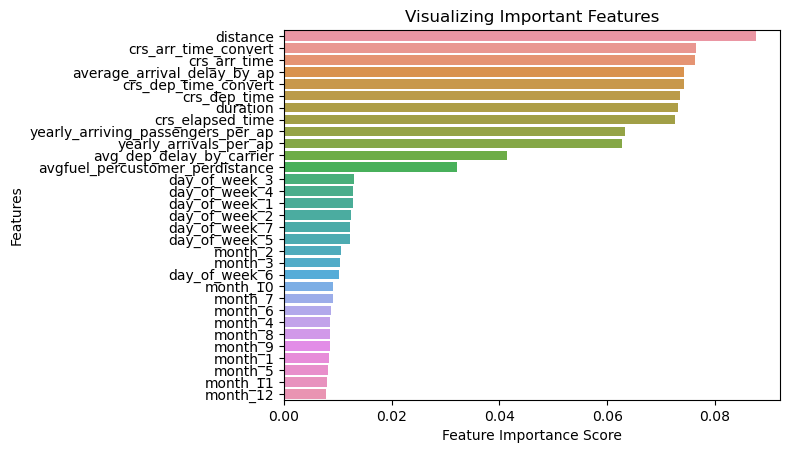

In [8]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

In [10]:
# Predict on the test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.6991


In [13]:
from sklearn.model_selection import GridSearchCV

rfc_hp=RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': [1,10,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,5,10,50]
}
CV_rfc = GridSearchCV(estimator=rfc_hp, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [1, 5, 10, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 10, 100]})

In [14]:
CV_rfc.best_params_

{'max_depth': 50, 'max_features': 'log2', 'n_estimators': 100}

In [15]:
print(f'Train Accuracy - : {CV_rfc.score(X_train,y_train):.3f}')
print(f'Test Accuracy - : {CV_rfc.score(X_test,y_test):.3f}')

Train Accuracy - : 0.998
Test Accuracy - : 0.697


In [18]:
rfc_hp_al = RandomForestClassifier(ccp_alpha=0.0001, max_depth=50, max_features='log2', n_estimators=100, random_state=0)
# fit the model to the training set
rfc_hp_al.fit(X_train, y_train)

# Predict on the test set results
y_pred = rfc_hp_al.predict(X_test)

# # Check accuracy score 
# print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [19]:
print(f'Train Accuracy - : {rfc_hp_al.score(X_train,y_train):.2f}')
print(f'Test Accuracy - : {rfc_hp_al.score(X_test,y_test):.2f}')

Train Accuracy - : 0.70
Test Accuracy - : 0.68


In [22]:
# Get a classification report with multiple statistics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72     10113
           1       0.65      0.60      0.62      8075

    accuracy                           0.68     18188
   macro avg       0.67      0.67      0.67     18188
weighted avg       0.68      0.68      0.68     18188



In [20]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {acc}')
print('Confusion matrix\n\n', cm)

Accuracy: 0.6780294699802067
Confusion matrix

 [[7498 2615]
 [3241 4834]]


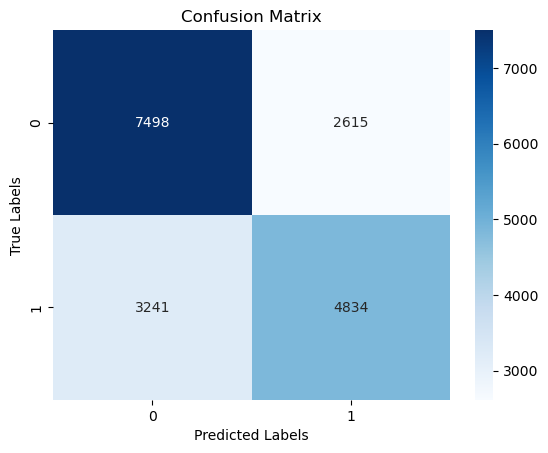

In [21]:
import seaborn as sns

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()